In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import pandas as pd
import numpy as np
import difflib as dff
from sklearn import tree
from sklearn import svm
import sklearn.linear_model as linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

%matplotlib inline

## Import the data and load it in a dataframe

In [3]:
import pandas as pd

# Define the path to your CSV file
path_csv = '/content/drive/MyDrive/h1b_history.csv'

# Define column names for your DataFrame
column_names = ['CASE_STATUS', 'EMPLOYER_NAME','SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'FILING_YEAR',\
                'WORKSITE', 'LONGITUDE', 'LATITUDE']

# Read the CSV file into a DataFrame
try:
    df1 = pd.read_csv(path_csv, names=column_names, skiprows=1, sep=',')
except pd.errors.ParserError as e:
    print(f"Error reading the file: {e}")



In [4]:
df1

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [5]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# Data Analysis and Preprocessing

In [6]:
# Checking whether missing data will effect our Analysis or not.

print(f'The Shape of Dataset With Missing Values is->\t {df1.shape}')
print()
q = df1.dropna()
print(f'The Shape of Dataset Without Missing Values is->\t {q.shape}')
print()
print("""So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.""")

The Shape of Dataset With Missing Values is->	 (3002458, 10)

The Shape of Dataset Without Missing Values is->	 (2877765, 10)

So as One can see missing values will not effect our Analysis as we have 30 million entries.
Hence no need to remove missing values.


Data Type and String Data Format conversion to upper case

In [7]:
df2 = df1.loc[df1['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [8]:
df2['FILING_YEAR'] = df2['FILING_YEAR'].astype(int)
df2['EMPLOYER_NAME'] = df2['EMPLOYER_NAME'].str.upper()
df2['SOC_NAME'] = df2['SOC_NAME'].str.upper()
df2['JOB_TITLE'] = df2['JOB_TITLE'].str.upper()
df2['FULL_TIME_POSITION'] = df2['FULL_TIME_POSITION'].str.upper()#datatype conversion for the year column

<ipython-input-8-31a25ab8ea4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FILING_YEAR'] = df2['FILING_YEAR'].astype(int)
<ipython-input-8-31a25ab8ea4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EMPLOYER_NAME'] = df2['EMPLOYER_NAME'].str.upper()
<ipython-input-8-31a25ab8ea4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [9]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,FILING_YEAR,WORKSITE,LONGITUDE,LATITUDE
19,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108
20,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.0,2016,"ALEXANDRIA, VIRGINIA",-77.046921,38.804836
23,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.0,2016,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738
24,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.0,2016,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054
26,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.0,2016,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108


### Row Counts v/s Case Status of the visa petition

<Axes: title={'center': 'CASE STATUS vs NUMBER OF PETITIONS'}, xlabel='CASE STATUS', ylabel='NUMBER OF PETITIONS'>

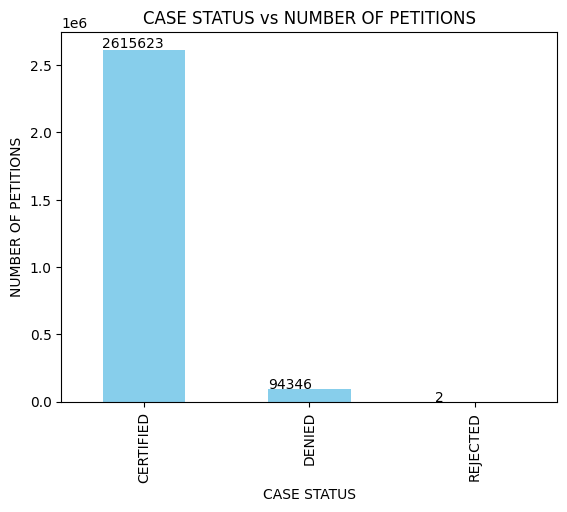

In [10]:
plot_status_number = df2['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'skyblue')
plot_status_number.set_xlabel("CASE STATUS")
plot_status_number.set_ylabel("NUMBER OF PETITIONS")
for p in plot_status_number.patches:
    plot_status_number.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plot_status_number


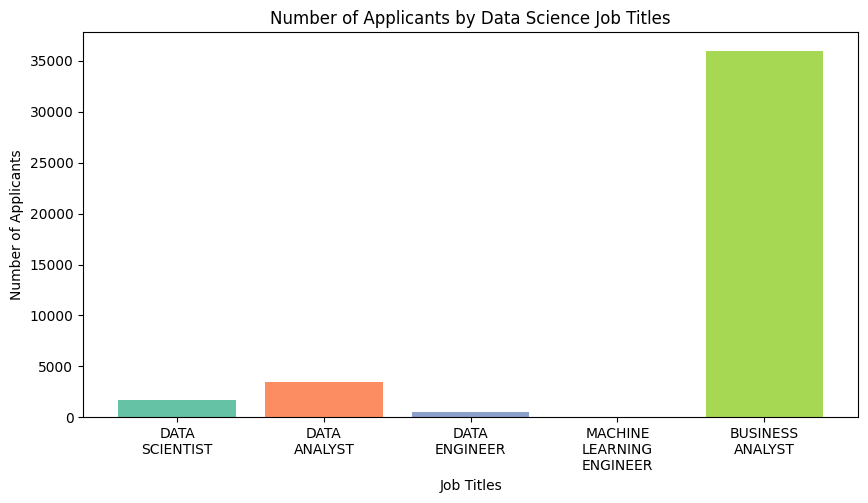

In [12]:
# Data science job profile includes job titles like Data Scientist, Data Analyst, Data Engineer, Machine Learning Engineer, Business Analyst.
jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
counts = []

# Counting the number of applicants related to each job title.
for job in jobs:
    count = df2[df2['JOB_TITLE'].str.upper() == job]['JOB_TITLE'].count()
    counts.append(count)

# Adjusted job titles for better visualization
job_labels = ['DATA\nSCIENTIST', 'DATA\nANALYST', 'DATA\nENGINEER', 'MACHINE\nLEARNING\nENGINEER', 'BUSINESS\nANALYST']

# Define a color palette
palette = sns.color_palette("Set2")

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x=job_labels, height=counts, color=palette)
plt.title('Number of Applicants by Data Science Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Applicants')
plt.show()


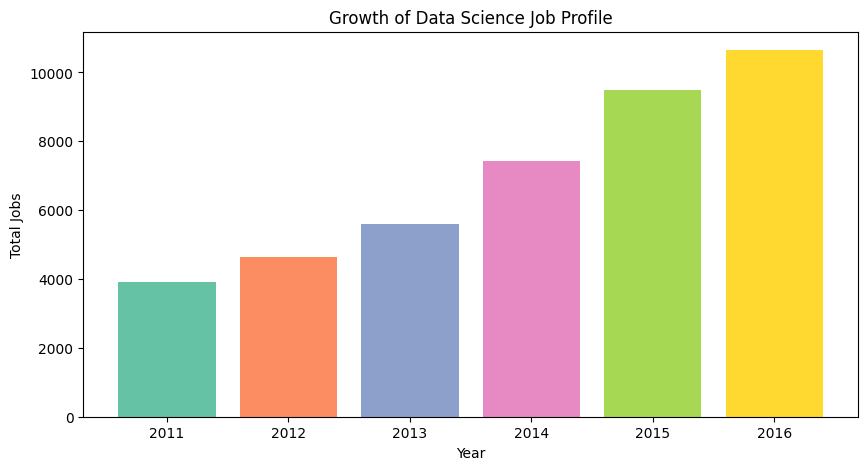

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data science job profile includes job titles like Data Scientist, Data Analyst, Data Engineer, Machine Learning Engineer, Business Analyst.
jobs = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'MACHINE LEARNING ENGINEER', 'BUSINESS ANALYST']
total = []

# Counting the number of applicants in each year for each job title.
for job in jobs:
    counts_per_year = df2[df2['JOB_TITLE'] == job].groupby('FILING_YEAR')['CASE_STATUS'].count()
    total.append(list(counts_per_year.values))

total = np.array(total)

# Adding all the jobs related to job profile Data Science according to year wise.
ds_total = [sum(total[:, year_index]) for year_index in range(total.shape[1])]

years = list(range(2011, 2017))  # Assuming your data spans from 2011 to 2016

# Define a color palette
palette = sns.color_palette("Set2")

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x=years, height=ds_total, color=palette)
plt.title('Growth of Data Science Job Profile')
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.show()


### The top 15 employers filing the H1-B visa petitions

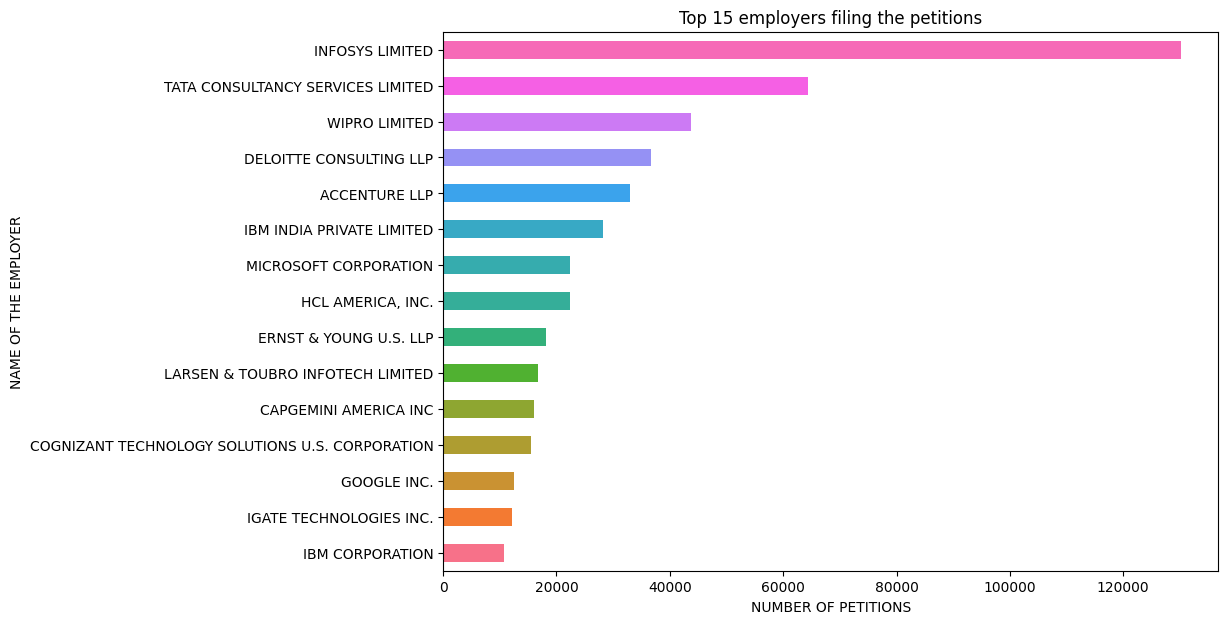

EMPLOYER_NAME
INFOSYS LIMITED                                    130241
TATA CONSULTANCY SERVICES LIMITED                   64358
WIPRO LIMITED                                       43679
DELOITTE CONSULTING LLP                             36667
ACCENTURE LLP                                       32983
IBM INDIA PRIVATE LIMITED                           28166
MICROSOFT CORPORATION                               22373
HCL AMERICA, INC.                                   22330
ERNST & YOUNG U.S. LLP                              18217
LARSEN & TOUBRO INFOTECH LIMITED                    16724
CAPGEMINI AMERICA INC                               16032
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     15448
GOOGLE INC.                                         12545
IGATE TECHNOLOGIES INC.                             12196
IBM CORPORATION                                     10690
Name: count, dtype: int64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the values in descending order
top_15_employers = df2['EMPLOYER_NAME'].value_counts().head(15).sort_values(ascending=True)

# Define the palette
palette = sns.color_palette("husl", len(top_15_employers))  # "husl" is one of the built-in palettes, you can choose any other palette you like

# Plot the bar chart with the specified palette
plot_status_topemp = top_15_employers.plot.barh(title="Top 15 employers filing the petitions", \
                                                                              color=palette, figsize=(10, 7))

# Set labels for x and y axes
plot_status_topemp.set_ylabel("NAME OF THE EMPLOYER")
plot_status_topemp.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
plt.show()

# Print the value counts
print(df2['EMPLOYER_NAME'].value_counts().head(15))


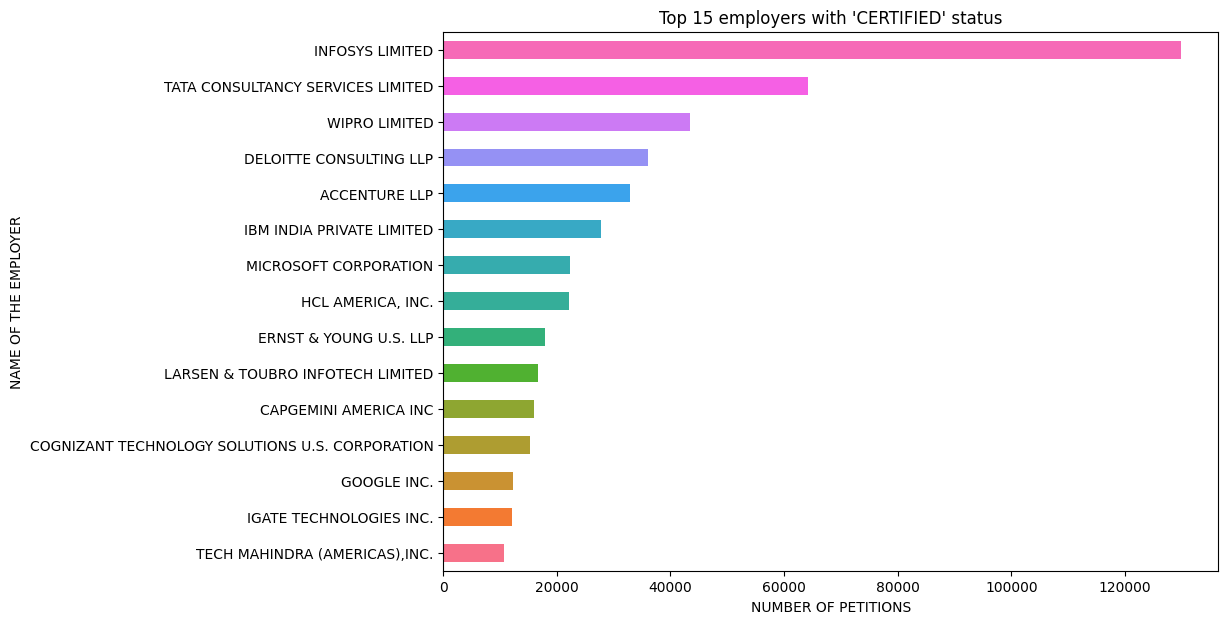

EMPLOYER_NAME
TECH MAHINDRA (AMERICAS),INC.                       10661
IGATE TECHNOLOGIES INC.                             12050
GOOGLE INC.                                         12353
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     15202
CAPGEMINI AMERICA INC                               15957
LARSEN & TOUBRO INFOTECH LIMITED                    16652
ERNST & YOUNG U.S. LLP                              17874
HCL AMERICA, INC.                                   22234
MICROSOFT CORPORATION                               22333
IBM INDIA PRIVATE LIMITED                           27745
ACCENTURE LLP                                       32911
DELOITTE CONSULTING LLP                             36120
WIPRO LIMITED                                       43476
TATA CONSULTANCY SERVICES LIMITED                   64237
INFOSYS LIMITED                                    129916
Name: count, dtype: int64


In [15]:
# Filter the DataFrame where 'CASE STATUS' is 'CERTIFIED'
certified_companies = df2[df2['CASE_STATUS'] == 'CERTIFIED']

# Get the top 15 employers from the filtered DataFrame
top_15_certified_employers = certified_companies['EMPLOYER_NAME'].value_counts().head(15).sort_values(ascending=True)

# Define the palette
palette = sns.color_palette("husl", len(top_15_certified_employers))

# Plot the bar chart
plot_top_certified_emp = top_15_certified_employers.plot.barh(title="Top 15 employers with 'CERTIFIED' status", \
                                                               color=palette, figsize=(10, 7))

# Set labels for x and y axes
plot_top_certified_emp.set_ylabel("NAME OF THE EMPLOYER")
plot_top_certified_emp.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
plt.show()

# Print the value counts
print(top_15_certified_employers)


### The top 15 SOC names for which H1-B visas are raised

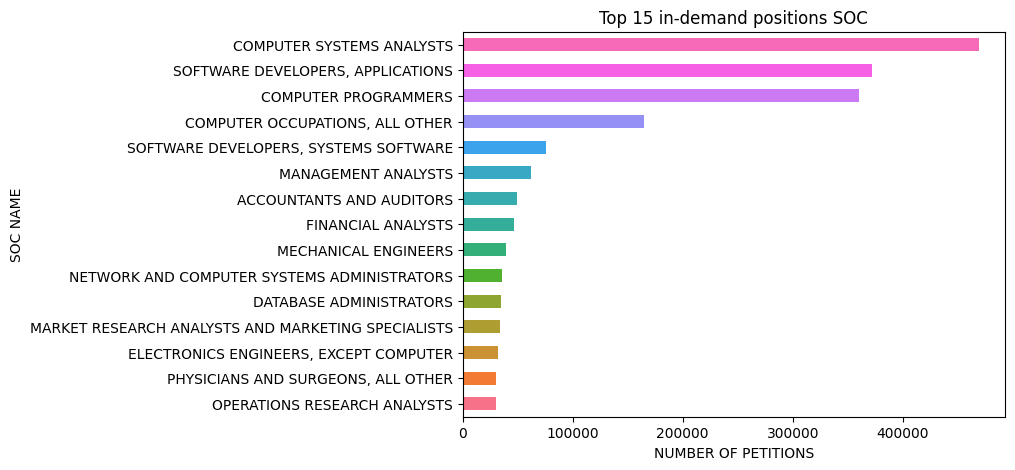

SOC_NAME
OPERATIONS RESEARCH ANALYSTS                           30328
PHYSICIANS AND SURGEONS, ALL OTHER                     30641
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                 31782
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     34433
DATABASE ADMINISTRATORS                                35303
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS            36219
MECHANICAL ENGINEERS                                   39844
FINANCIAL ANALYSTS                                     46730
ACCOUNTANTS AND AUDITORS                               49780
MANAGEMENT ANALYSTS                                    62096
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  75806
COMPUTER OCCUPATIONS, ALL OTHER                       164659
COMPUTER PROGRAMMERS                                  360575
SOFTWARE DEVELOPERS, APPLICATIONS                     372125
COMPUTER SYSTEMS ANALYSTS                             469300
Name: count, dtype: int64


In [16]:
# Sort the values in descending order
top_15_soc = df2['SOC_NAME'].value_counts().head(15).sort_values(ascending=True)  # Change ascending to True

# Define the palette
palette = sns.color_palette("husl", len(top_15_soc))

# Plot the bar chart
plot_status_topsoc = top_15_soc.plot.barh(title="Top 15 in-demand positions SOC", color=palette, figsize=(7, 5))

# Set labels for x and y axes
plot_status_topsoc.set_ylabel("SOC NAME")
plot_status_topsoc.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
plt.show()

# Print the value counts
print(top_15_soc)


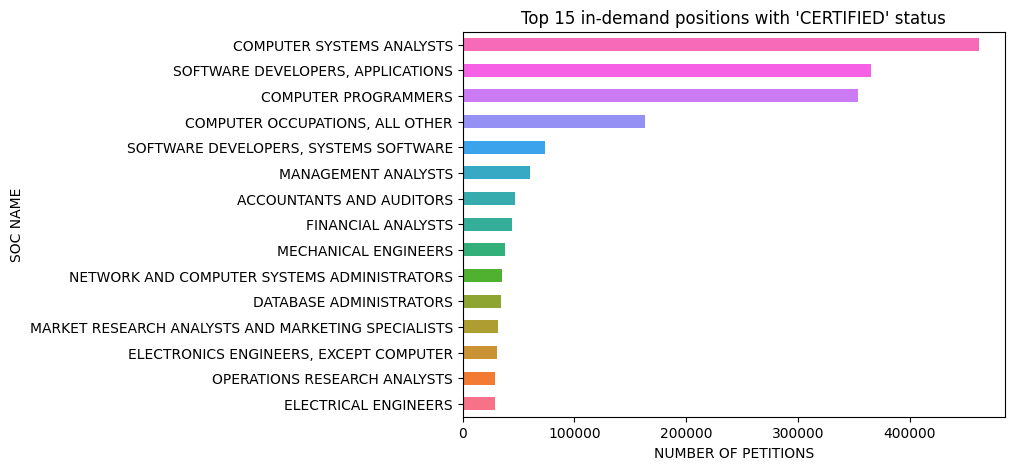

SOC_NAME
ELECTRICAL ENGINEERS                                   28941
OPERATIONS RESEARCH ANALYSTS                           29473
ELECTRONICS ENGINEERS, EXCEPT COMPUTER                 30924
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS     32100
DATABASE ADMINISTRATORS                                34452
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS            35468
MECHANICAL ENGINEERS                                   38303
FINANCIAL ANALYSTS                                     44620
ACCOUNTANTS AND AUDITORS                               46653
MANAGEMENT ANALYSTS                                    60231
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                  74035
COMPUTER OCCUPATIONS, ALL OTHER                       162949
COMPUTER PROGRAMMERS                                  354069
SOFTWARE DEVELOPERS, APPLICATIONS                     365564
COMPUTER SYSTEMS ANALYSTS                             462116
Name: count, dtype: int64


In [17]:
# Filter the DataFrame where 'CASE STATUS' is 'CERTIFIED'
certified_positions = df2[df2['CASE_STATUS'] == 'CERTIFIED']

# Get the top 15 in-demand positions from the filtered DataFrame
top_15_certified_soc = certified_positions['SOC_NAME'].value_counts().head(15).sort_values(ascending=True)

# Define the palette
palette = sns.color_palette("husl", len(top_15_certified_soc))

# Plot the bar chart
plot_top_certified_soc = top_15_certified_soc.plot.barh(title="Top 15 in-demand positions with 'CERTIFIED' status", \
                                                         color=palette, figsize=(7, 5))

# Set labels for x and y axes
plot_top_certified_soc.set_ylabel("SOC NAME")
plot_top_certified_soc.set_xlabel("NUMBER OF PETITIONS")

# Show the plot
plt.show()

# Print the value counts
print(top_15_certified_soc)


### Acceptance rate of the H1-B Visa petitions through different years

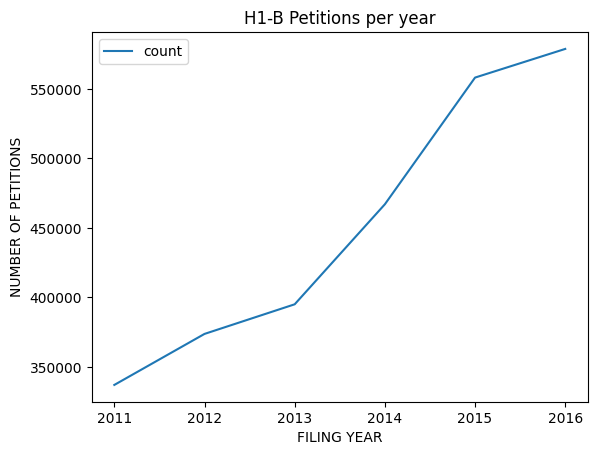

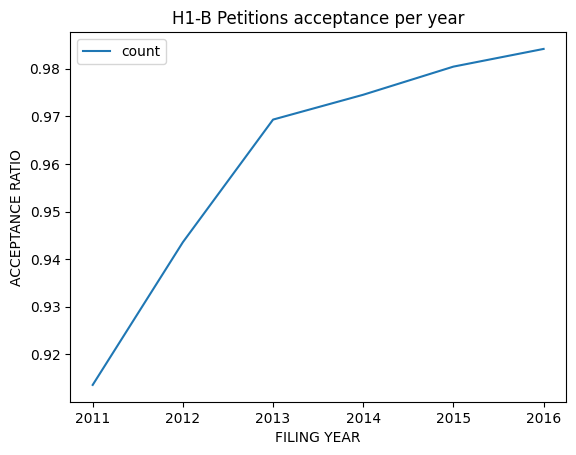

In [18]:
dfplot_status_fyear = pd.DataFrame(df2['FILING_YEAR'].value_counts())
dfplot_status_fyear = dfplot_status_fyear.sort_values(['FILING_YEAR'])
plot_status_fyear = dfplot_status_fyear.plot(title = 'H1-B Petitions per year', kind = 'line')
plot_status_fyear.set_xlabel('FILING YEAR')
plot_status_fyear.set_ylabel('NUMBER OF PETITIONS')
plt.show()

dfstatus_acceptance_peryear = pd.DataFrame(df2[df2['CASE_STATUS'] == 'CERTIFIED'].FILING_YEAR.value_counts() / df2.FILING_YEAR.value_counts())
dfstatus_acceptance_peryear = dfstatus_acceptance_peryear.sort_values(['FILING_YEAR'])
status_acceptance_peryear = dfstatus_acceptance_peryear.plot(title = 'H1-B Petitions acceptance per year', kind = 'line')
status_acceptance_peryear.set_xlabel('FILING YEAR')
status_acceptance_peryear.set_ylabel('ACCEPTANCE RATIO')
plt.show()

### Salaries trend per year

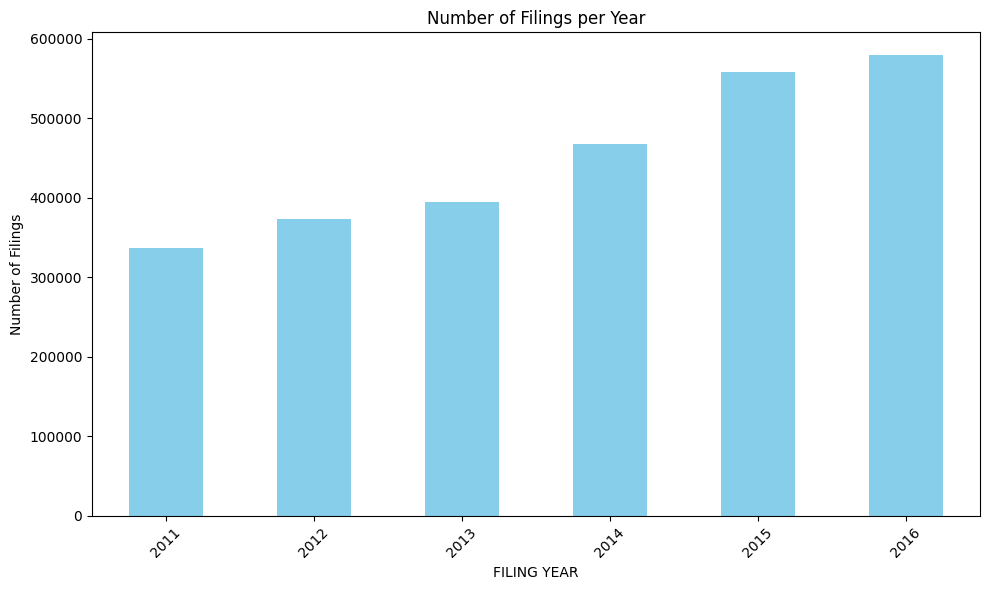

In [19]:
# Count the number of filings per year
filings_per_year = df2['FILING_YEAR'].value_counts().sort_index()

# Plot the count of filings per year
plt.figure(figsize=(10, 6))
filings_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('FILING YEAR')
plt.ylabel('Number of Filings')
plt.title('Number of Filings per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Filter the rows and keep the ones with case status as 'CERTIFIED' or 'DECLINED'

In [20]:
print(df2['CASE_STATUS'].unique())
df2 = df2.loc[df2['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])] #filtering

['CERTIFIED' 'DENIED' 'REJECTED']


### Remove rows with null values for EMPLOYER_NAME, SOC_NAME, JOB_TITLE, FULL_TIME_POSITION, PREVAILING_WAGE

In [21]:
df2.isnull().sum(axis = 0)

CASE_STATUS               0
EMPLOYER_NAME            18
SOC_NAME              15893
JOB_TITLE                10
FULL_TIME_POSITION        1
PREVAILING_WAGE          53
FILING_YEAR               0
WORKSITE                  0
LONGITUDE             97071
LATITUDE              97071
dtype: int64

In [22]:
df3 = df2.dropna(axis=0, how='any', subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
                                                      'FULL_TIME_POSITION', 'PREVAILING_WAGE'])


### Find the number of certified and denied of all the needed columns with their count

In [23]:
print(df2.shape)
print(df3.shape)

(2709969, 10)
(2694002, 10)


In [24]:
df3.CASE_STATUS.value_counts()

CASE_STATUS
CERTIFIED    2600241
DENIED         93761
Name: count, dtype: int64

### Downsampling the Data to match the ratio of certified and denied samples

In [25]:
table_temp_2_Dx = df3[df3['CASE_STATUS'] == 'DENIED']

In [26]:
table_temp_2_Cx = df3[df3['CASE_STATUS'] == 'CERTIFIED']

In [27]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(df3[df3.CASE_STATUS == 'CERTIFIED'],\
                                                                                          table_temp_2_Cx.CASE_STATUS, train_size= 0.06, random_state=1)


In [28]:

training_dataframe = pd.concat([Input_Certified, table_temp_2_Dx], ignore_index=True)



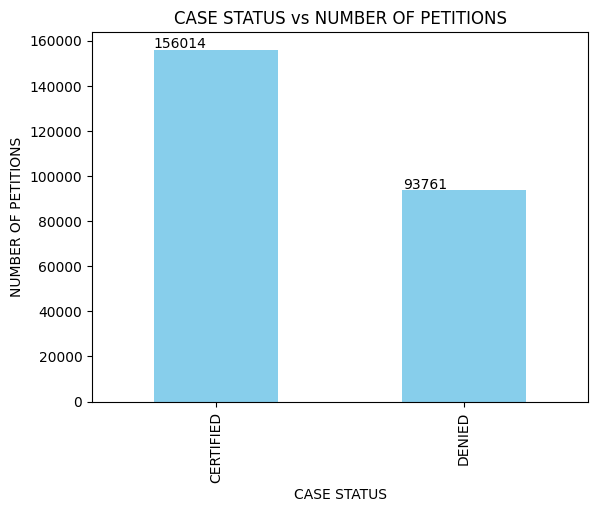

In [29]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'CASE STATUS vs NUMBER OF PETITIONS', \
                                                                kind = 'bar', color = 'skyblue')
plot_after_ds.set_xlabel("CASE STATUS")
plot_after_ds.set_ylabel("NUMBER OF PETITIONS")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

# Features Creation and Categorisation

For the given categorical data, they need to convert it to numerical values

There are three ways to convert the categorical data to numerical ones.

1. Encoding to ordinal values
2. Feature Hashing
3. One-Hot Encoding

Prior selecting any of the above methods, it is necessary to get the details of the unique values for each of the columns/Features. Below is the plot for the same.

In [30]:
# one-hot encoding for every possible and needed column
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  983
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


### Feature Categorisation Functions

In [31]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [32]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [33]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

### Feature Creation for One-Hot Encoding

In [34]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [35]:
training_dataframe.WORKSITE.unique()

array(['PENNSYLVANIA', 'TEXAS', 'NEW YORK', 'CALIFORNIA', 'CONNECTICUT',
       'WASHINGTON', 'MISSOURI', 'OREGON', 'VIRGINIA', 'MASSACHUSETTS',
       'OHIO', 'ILLINOIS', 'FLORIDA', 'TENNESSEE', 'IDAHO', 'MARYLAND',
       'GEORGIA', 'NORTH CAROLINA', 'NEBRASKA', 'MINNESOTA', 'DELAWARE',
       'NEW HAMPSHIRE', 'ALABAMA', 'NEW JERSEY', 'WISCONSIN', 'ARIZONA',
       'INDIANA', 'MICHIGAN', 'IOWA', 'COLORADO', 'NEW MEXICO',
       'SOUTH CAROLINA', 'LOUISIANA', 'UTAH', 'KENTUCKY', 'ALASKA',
       'DISTRICT OF COLUMBIA', 'OKLAHOMA', 'ARKANSAS', 'RHODE ISLAND',
       'VERMONT', 'MAINE', 'MISSISSIPPI', 'NA', 'KANSAS', 'NEVADA',
       'HAWAII', 'WYOMING', 'PUERTO RICO', 'WEST VIRGINIA', 'MONTANA',
       'NORTH DAKOTA', 'SOUTH DAKOTA'], dtype=object)

<ipython-input-36-21c63a67fd8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=certified_states_count.values, y=certified_states_count.index, palette='viridis')


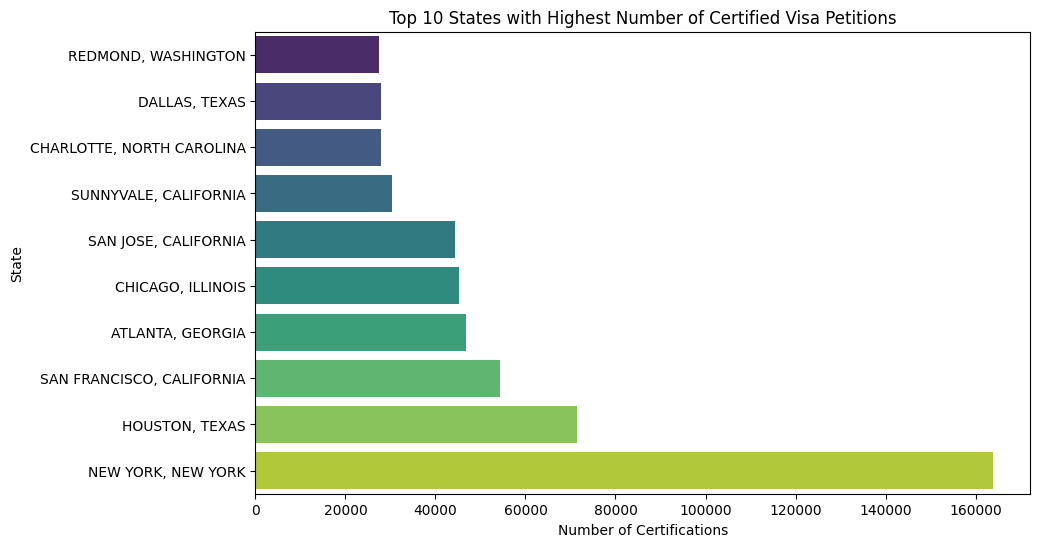

In [36]:
# Filter the DataFrame for instances where 'CASE_STATUS' is 'CERTIFIED'
certified_states = df2[df2['CASE_STATUS'] == 'CERTIFIED']

# Count the occurrences of each state
certified_states_count = certified_states['WORKSITE'].value_counts().head(10).sort_values(ascending=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=certified_states_count.values, y=certified_states_count.index, palette='viridis')

# Set labels and title
plt.xlabel('Number of Certifications')
plt.ylabel('State')
plt.title('Top 10 States with Highest Number of Certified Visa Petitions')

# Show the plot
plt.show()


In [37]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [38]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [39]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [40]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [41]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [42]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [43]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [44]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.FILING_YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [45]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:

    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass


In [46]:
training_dataframe['FILING_YEAR'] = training_dataframe['FILING_YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'FILING_YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,FILING_YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
0,1,2015,PENNSYLVANIA,LOW,VHA,VHA,HA,1
1,1,2016,PENNSYLVANIA,MEDIUM,VHA,HA,HA,1
2,1,2012,TEXAS,VERY LOW,LA,VHA,MA,1
3,1,2013,PENNSYLVANIA,MEDIUM,VHA,VHA,HA,1
4,1,2012,NEW YORK,LOW,VHA,LA,LA,1


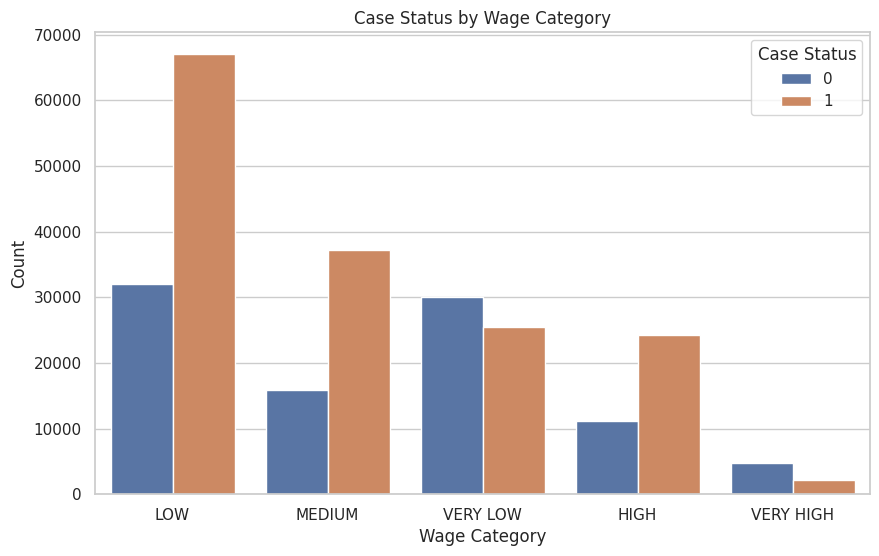

In [47]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=training_dataframe, x='WAGE_CATEGORY', hue='CASE_STATUS')
plt.title('Case Status by Wage Category')
plt.xlabel('Wage Category')
plt.ylabel('Count')
plt.legend(title='Case Status')
plt.show()


### Apply One-hot encoding

In [48]:
final_df_train = pd.get_dummies(training_dataframe, columns=['FILING_YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',

                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head()

,CASE_STATUS,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
0,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,1,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,1,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,1,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


### RFE for feature elimination

In [49]:

# Define the model (estimator)
model = LogisticRegression()

# Specify the number of features to select
num_features = 30

# Initialize the RFE object with the model and the number of features
rfe = RFE(estimator=model, n_features_to_select=num_features)

# Fit the RFE object to the training data
fit = rfe.fit(final_df_train.iloc[:,1:], final_df_train.iloc[:,0])

# Get the support of selected features
support_rfe = rfe.support_

# Get the list of selected features
list_selected = final_df_train.iloc[:,1:].columns[rfe.support_].tolist()
print(list_selected)

# Get the ranking of features
print(rfe.ranking_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

['FILING_YEAR_2012', 'FILING_YEAR_2013', 'FILING_YEAR_2014', 'FILING_YEAR_2015', 'FILING_YEAR_2016', 'WORKSITE_ALASKA', 'WORKSITE_DISTRICT OF COLUMBIA', 'WORKSITE_KANSAS', 'WORKSITE_KENTUCKY', 'WORKSITE_MAINE', 'WORKSITE_MISSISSIPPI', 'WORKSITE_NA', 'WORKSITE_NORTH DAKOTA', 'WORKSITE_OKLAHOMA', 'WORKSITE_SOUTH DAKOTA', 'FULL_TIME_POSITION_1', 'WAGE_CATEGORY_VERY HIGH', 'EMPLOYER_ACCEPTANCE_HA', 'EMPLOYER_ACCEPTANCE_LA', 'EMPLOYER_ACCEPTANCE_MA', 'EMPLOYER_ACCEPTANCE_VHA', 'EMPLOYER_ACCEPTANCE_VLA', 'JOB_ACCEPTANCE_HA', 'JOB_ACCEPTANCE_LA', 'JOB_ACCEPTANCE_MA', 'JOB_ACCEPTANCE_VHA', 'JOB_ACCEPTANCE_VLA', 'SOC_ACCEPTANCE_LA', 'SOC_ACCEPTANCE_MA', 'SOC_ACCEPTANCE_VLA']
[ 1  1  1  1  1  1 22 14 32 11 39 24  1  9 18 15 35 21 48  6  1  1 27  1
 42 46 38 47  1 44 36  1  7 19  5 26  3 23 34  1 28  1 10 37 29 20  4  1
 25 41 31 40 45 17 13  8 33  1 16 43  1 12  1  1  1  1  1  1  1  1  1  1
  2  1  1 30  1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
unique_listcols = [col.split('_')[0] for col in list_selected]
set(unique_listcols)

{'EMPLOYER', 'FILING', 'FULL', 'JOB', 'SOC', 'WAGE', 'WORKSITE'}

Splitting into training and test data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=1)
#y_train[y_train==1].shape
y_test[y_test==1].shape

(31337,)

In [53]:
X_train.head()

,FILING_YEAR_2012,FILING_YEAR_2013,FILING_YEAR_2014,FILING_YEAR_2015,FILING_YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
23571,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
222705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
169207,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
17066,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
239183,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [54]:
X_train.columns

Index(['FILING_YEAR_2012', 'FILING_YEAR_2013', 'FILING_YEAR_2014',
       'FILING_YEAR_2015', 'FILING_YEAR_2016', 'WORKSITE_ALASKA',
       'WORKSITE_ARIZONA', 'WORKSITE_ARKANSAS', 'WORKSITE_CALIFORNIA',
       'WORKSITE_COLORADO', 'WORKSITE_CONNECTICUT', 'WORKSITE_DELAWARE',
       'WORKSITE_DISTRICT OF COLUMBIA', 'WORKSITE_FLORIDA', 'WORKSITE_GEORGIA',
       'WORKSITE_HAWAII', 'WORKSITE_IDAHO', 'WORKSITE_ILLINOIS',
       'WORKSITE_INDIANA', 'WORKSITE_IOWA', 'WORKSITE_KANSAS',
       'WORKSITE_KENTUCKY', 'WORKSITE_LOUISIANA', 'WORKSITE_MAINE',
       'WORKSITE_MARYLAND', 'WORKSITE_MASSACHUSETTS', 'WORKSITE_MICHIGAN',
       'WORKSITE_MINNESOTA', 'WORKSITE_MISSISSIPPI', 'WORKSITE_MISSOURI',
       'WORKSITE_MONTANA', 'WORKSITE_NA', 'WORKSITE_NEBRASKA',
       'WORKSITE_NEVADA', 'WORKSITE_NEW HAMPSHIRE', 'WORKSITE_NEW JERSEY',
       'WORKSITE_NEW MEXICO', 'WORKSITE_NEW YORK', 'WORKSITE_NORTH CAROLINA',
       'WORKSITE_NORTH DAKOTA', 'WORKSITE_OHIO', 'WORKSITE_OKLAHOMA',
       'WORK

# Training classifiers

## Decision Tree Model

In [55]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X_train, y_train)

In [56]:
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

test 72056     1
39753     1
57844     1
148029    1
58231     1
167159    0
36747     1
221417    0
192816    0
46873     1
Name: CASE_STATUS, dtype: int64
pred [1 1 1 1 1 1 1 0 1 1]

[[14786  3832]
 [ 2124 29213]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     18618
           1       0.88      0.93      0.91     31337

    accuracy                           0.88     49955
   macro avg       0.88      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



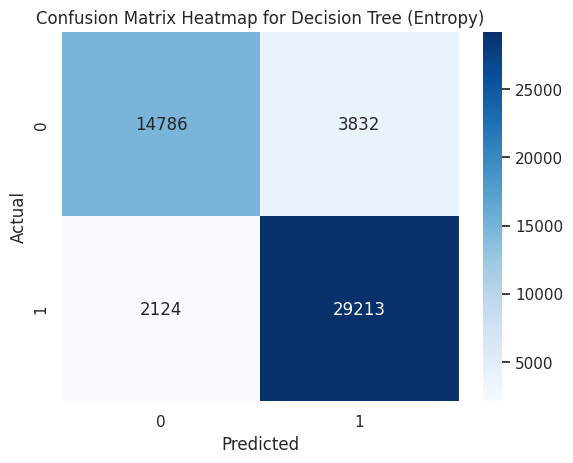

In [57]:
conf_matrix_dtree = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Decision Tree (Entropy)')
plt.show()


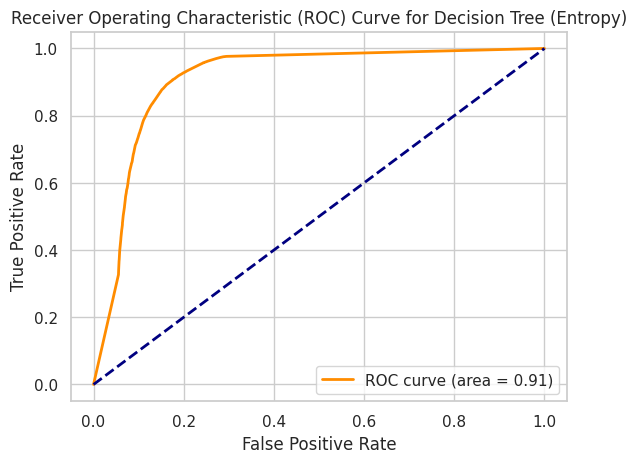

In [59]:
# Calculate ROC curve
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_test, y_prob[:,1])
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dtree, tpr_dtree, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dtree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree (Entropy)')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression Model

In [60]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))


test 72056     1
39753     1
57844     1
148029    1
58231     1
167159    0
36747     1
221417    0
192816    0
46873     1
Name: CASE_STATUS, dtype: int64
pred [1 1 1 1 1 1 0 0 1 1]
[[14412  4206]
 [ 1180 30157]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     18618
           1       0.88      0.96      0.92     31337

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.90      0.89      0.89     49955



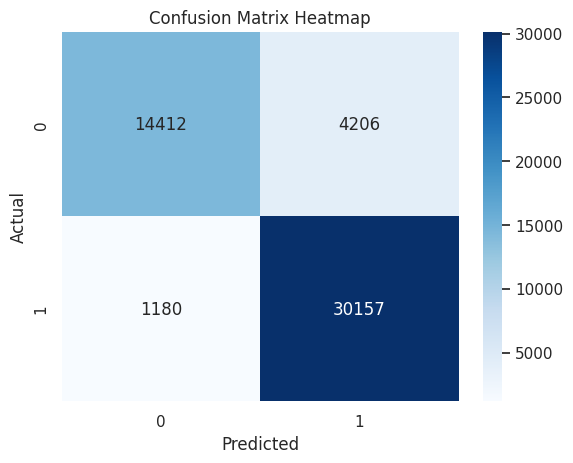

In [62]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


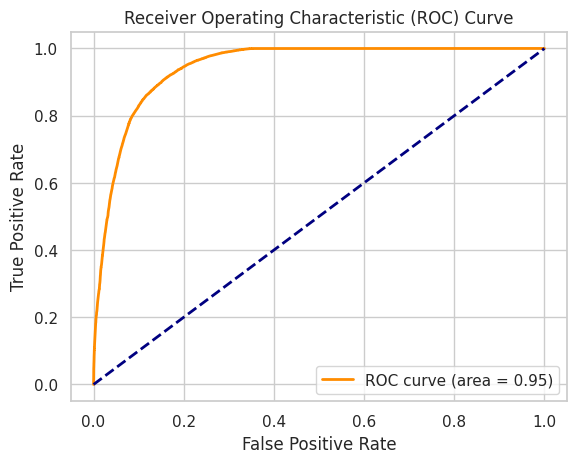

In [63]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Random Forest Classifier

In [64]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=50)

In [65]:
y_pred_rf =  rf.predict(X_test)
probs = rf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

test 72056     1
39753     1
57844     1
148029    1
58231     1
167159    0
36747     1
221417    0
192816    0
46873     1
Name: CASE_STATUS, dtype: int64
pred [1 1 1 1 1 1 1 0 1 1]
[[14599  4019]
 [ 1787 29550]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83     18618
           1       0.88      0.94      0.91     31337

    accuracy                           0.88     49955
   macro avg       0.89      0.86      0.87     49955
weighted avg       0.88      0.88      0.88     49955



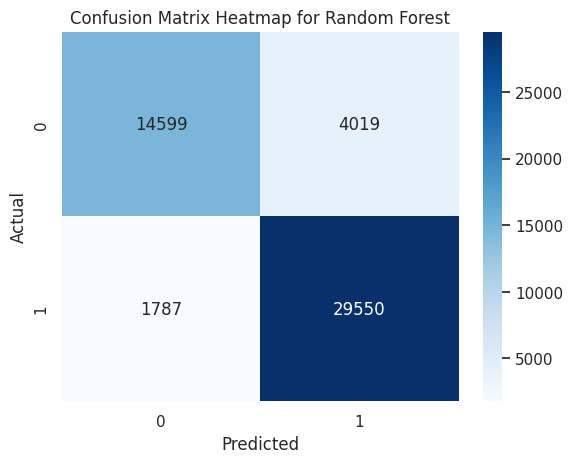

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Random Forest')
plt.show()


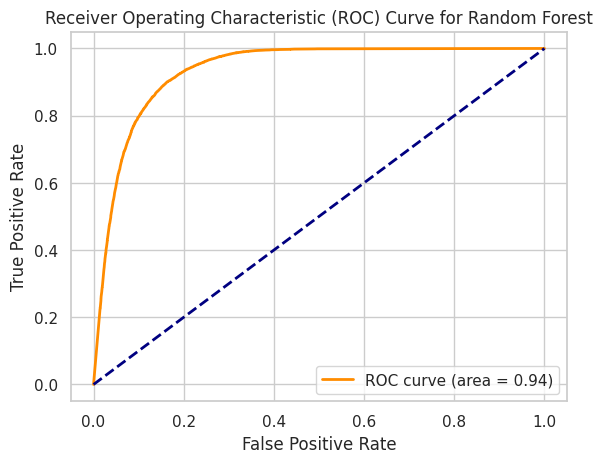

In [67]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()
